In [106]:
import pandas as pd
import numpy as np
from heapq import nlargest
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import json
import networkx as nx
import statistics as stat

## Pre-processing

In [107]:
# Reading the JSON files into DataFrames using chunk
# Using chunksize to determine the no of rows that'll be added to the DataFrames
chunk_set_1 = pd.read_json('dblp.v10/dblp.v10/dblp-ref/dblp-ref-0.json', lines=True, chunksize = 10000)
for chunk in chunk_set_1:
    part_df1 = chunk
    break             

chunk_set_2 = pd.read_json('dblp.v10/dblp.v10/dblp-ref/dblp-ref-1.json', lines=True, chunksize = 10000)
for chunk in chunk_set_2:
    part_df2 = chunk
    break

In [108]:
# Reading the data from json files in a seperate code block because of RAM limitations
chunk_set_3 = pd.read_json('dblp.v10/dblp.v10/dblp-ref/dblp-ref-2.json', lines=True, chunksize = 10000)
for chunk in chunk_set_3:
    part_df3 = chunk
    break

chunk_set_4 = pd.read_json('dblp.v10/dblp.v10/dblp-ref/dblp-ref-3.json', lines=True, chunksize = 10000)
for chunk in chunk_set_4:
    part_df4 = chunk
    break
	

In [109]:
# Concatanating all four dataframes created above into one dataframe
combined_df = pd.concat([part_df1, part_df2, part_df3, part_df4])
combined_df


,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266
...,...,...,...,...,...,...,...,...
9995,"So far, Evolutionary Algorithms (EA) have been...",[Noor Shaker],0,"[0de01fad-3183-4c26-a925-8e5923b6eab6, 0f4a05c...",Intrinsically motivated reinforcement learning...,computational intelligence and games,2016,fedbdc0d-b841-442f-bea4-8c20d11370ce
9996,The new HLRS flagship system Hazel Hen (a Cray...,"[Thomas Bönisch, Michael M. Resch, Thomas Schw...",0,[],Hazel Hen – leading HPC technology and its imp...,parallel computing,2017,fee17bbd-256e-4051-84a1-39fe2cb978f8
9997,Despite a decrease in the use of currency due ...,"[Ji Woo Lee, Hyung Gil Hong, Ki-Wan Kim, Kang ...",0,"[0220d23c-53bb-44e5-99e9-74ba811dd6b2, 0369271...",A Survey on Banknote Recognition Methods by Va...,Sensors,2017,ffdc5c57-5e3c-4693-9695-846ed92df2b1
9998,The bipartite consensus problem of multiple tw...,"[Wu Yang, Yan-Wu Wang, Jiang-Wen Xiao, Wu-Hua ...",0,"[07d00f5d-7593-478f-89e9-c2490be3adb3, 0bcb328...",Bipartite consensus for multiple two-time scal...,"international conference on control, automatio...",2016,fff177a7-d0fb-4f52-bcaf-8e438c72c87d


In [110]:
# The existing dataframe has tons of Nan values in "References" column
# So, creating a new dataframe, whose "References" column is not NaN from our existing dataframe 
dblp_dataset = combined_df[combined_df['references'].notna()]

## Sample data for sample analysis

In [111]:
# Using a seed value to randomly select 10 rows for sample analysis
dblp_data = dblp_dataset.sample(10, random_state = 11111995)
dblp_data


,abstract,authors,n_citation,references,title,venue,year,id
7220,We present a fully implicit finite difference ...,"[Rossitza S. Marinova, Raymond J. Spiteri, Edd...",0,"[5ae87024-b6c1-40e2-bf99-e987d54145bd, ea38e4e...",Time stepping for vectorial operator splitting,Journal of Computational and Applied Mathematics,2010,4d1afccb-c196-4c5b-9396-addf48198a4b
2308,This paper proposes a robust approach to recog...,"[J. Rekha, J. Bhattacharya, S. Majumder]",50,"[17e0aaca-5ce8-4b74-b0cd-9cdf20f5030e, 323c815...",Improved hand tracking and isolation from face...,,2011,a88e36f0-e91f-483f-9d40-1edc390e56d0
103,To better understand the characteristics of se...,"[Yanbin Yao, Dameng Liu, Dazhen Tang, Shuheng ...",13,[],Fractal characterization of seepage-pores of c...,Computers & Geosciences,2009,4aac3301-f9d7-4831-9629-e7555a404938
4133,NaN,"[Minglun Ren, Panpan Yang]",0,"[95b6c175-569f-4d77-ba3d-a3141b330c15, a3d46e5...",SOA Based MRO Planning System with Knowledge R...,,2012,3109ad68-98cc-41a8-90ee-981448668a16
2723,Bridging IEEE 1394 buses is becoming important...,"[Jonghun Yoo, Ji-Yong Park, Seongsoo Hong, Yeo...",3,[],Seamlessly interconnecting legacy IEEE 1394 de...,IEEE Transactions on Consumer Electronics,2008,4b9942a5-37ac-4410-909f-80d7e455bce1
9206,We give an algorithm to morph between two plan...,"[Therese C. Biedl, Anna Lubiw, Mark Petrick, M...",50,"[22edaeae-5899-46cd-86b2-736378ba69b8, 343e053...",Morphing orthogonal planar graph drawings,symposium on discrete algorithms,2006,4dc464c1-3f6d-40b2-b532-52d368092b3e
5893,NaN,"[Martin Hansson, Atila Alvandpour]",0,[],A low clock load conditional flip-flop,Annals of Physical and Rehabilitation Medicine,2004,e3f3e979-bd6e-42ac-a888-e45ce5125100
6403,Recently there has been interest in applying t...,"[Russell P. Kraft, John F. McDonald, F.F. Ahlg...",0,[],Minimax optimization of two-dimensional focuse...,"international conference on acoustics, speech,...",1979,4cd2c5af-93d1-45ac-b96f-cd257912f687
4227,Due to the increasing popularity of microblogg...,"[Manos Schinas, Symeon Papadopoulos, Yiannis K...",19,"[1bdeb30f-068f-47fc-b66e-5ed65843c4d1, 2f9d6d1...",Visual Event Summarization on Social Media usi...,international conference on multimedia retrieval,2015,4ba2b7f2-a485-4873-855f-b2fee707a5cf
9960,The distinguished features of mobile computing...,"[Rong Peng, Dong Sun, Wei-Tek Tsai]",50,"[145e9475-afcb-46f7-b1bf-853c5d7a2aa0, 1757fcd...",Success factors in mobile social networking ap...,acm symposium on applied computing,2014,4cfb84f0-4fcf-4d3d-a5ab-5ebf5b07ea00


## Known Authors Graph

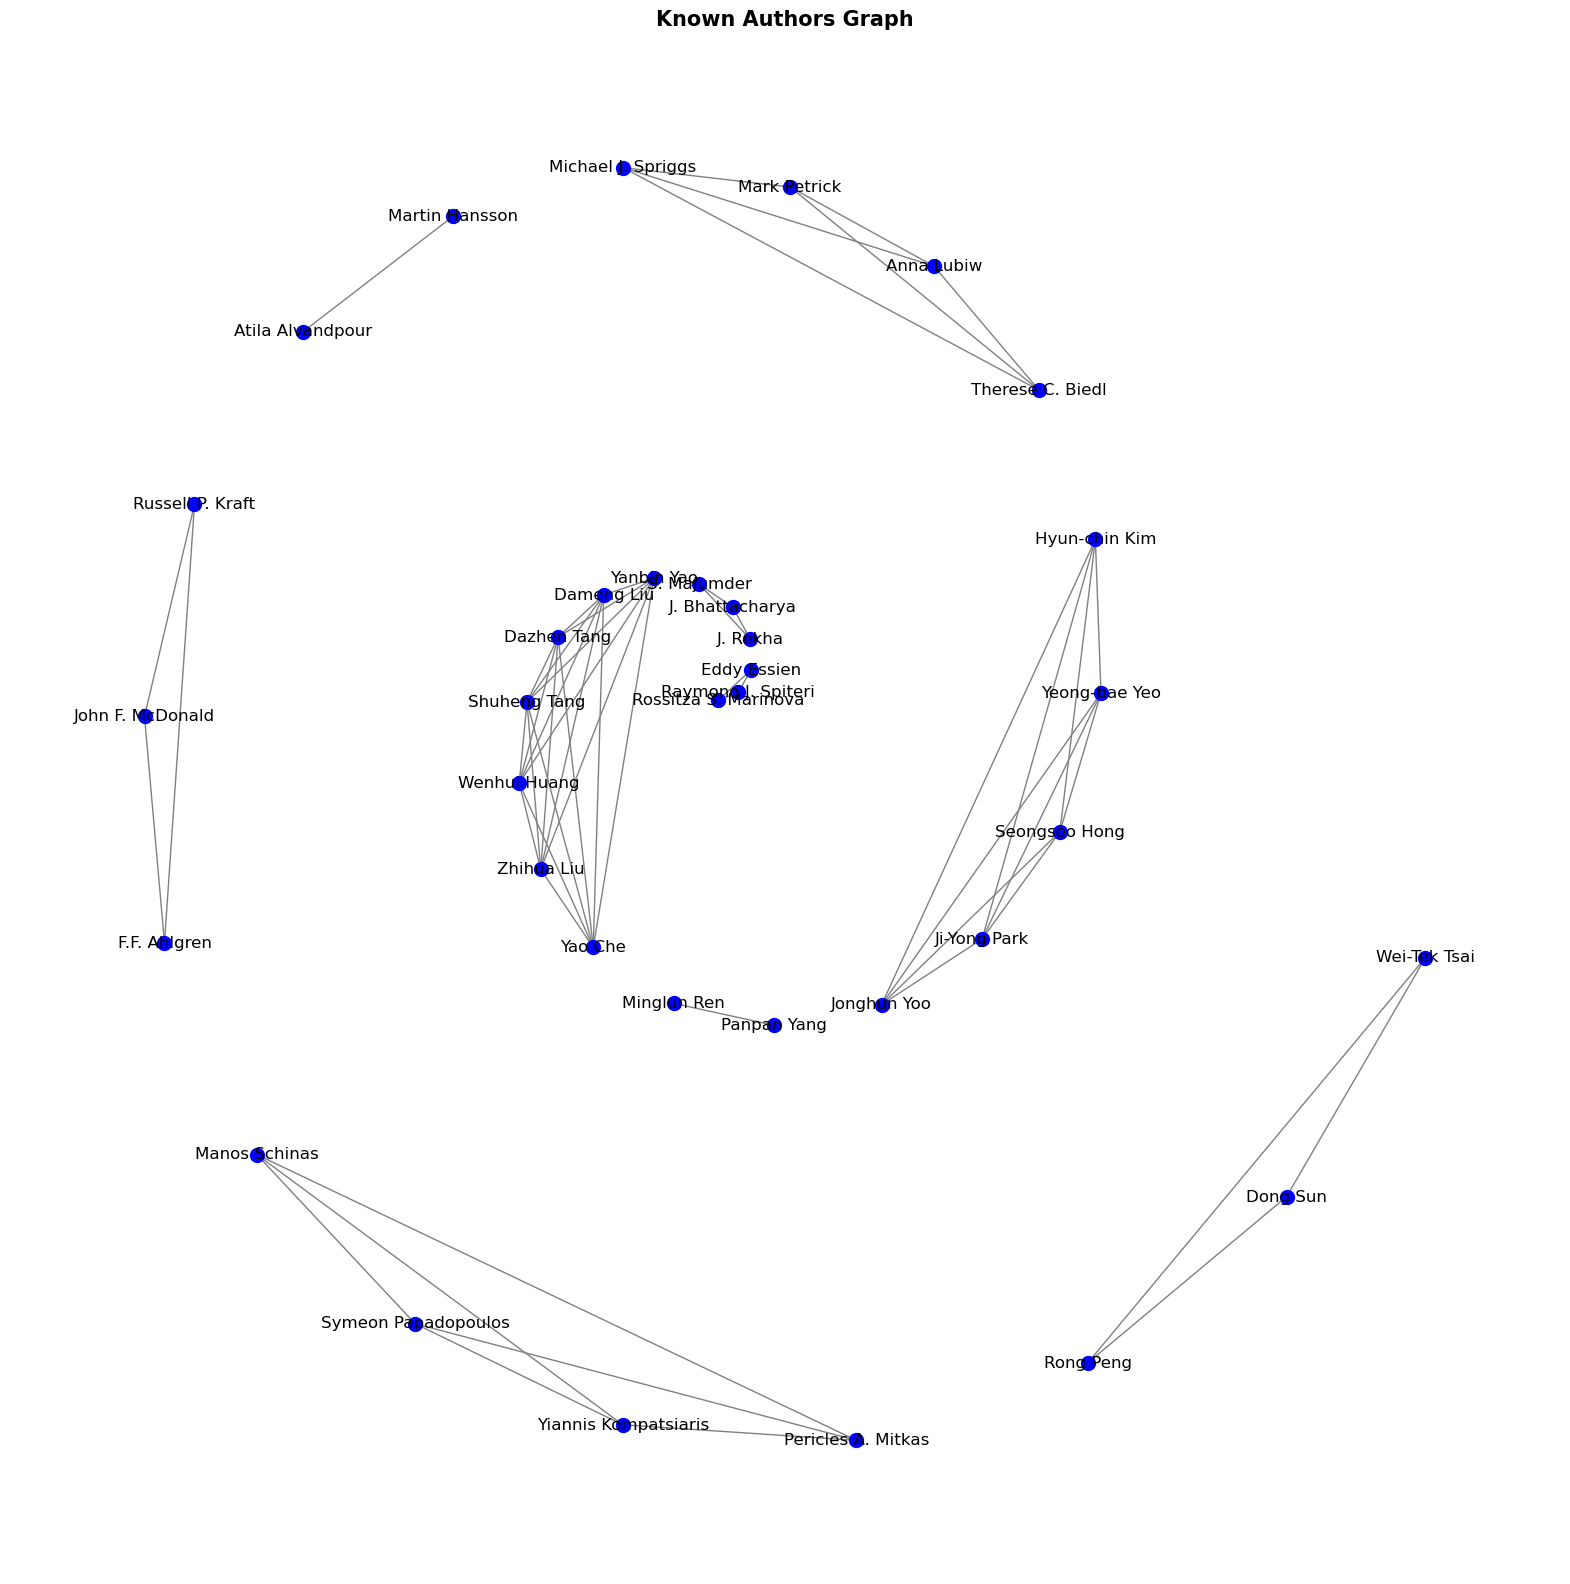

In [112]:
# nested list, where each list represents a paper and 
# the list within that list represents the names of co-authors for that paper
coauthors_nested_list = list(dblp_data["authors"])
coauthor_map = {}
for coauthors in coauthors_nested_list:
  for i in range(len(coauthors)):
    primary_author = coauthors[i]
    coauthor_map[primary_author] = coauthors

# Passing the dict into nx.Graph to return a graph
coauthor_graph = nx.Graph(coauthor_map)

# Since the keys contained themselves in the values above, 
# we are getting rid of the self loop edges here
coauthor_graph.remove_edges_from(nx.selfloop_edges(coauthor_graph))

# plotting the graph for visual representation
fig = plt.figure(figsize=(20,20)) ;
plt.title('Known Authors Graph', fontweight='bold', fontsize='15')
pos = nx.spiral_layout(coauthor_graph)
nx.draw(coauthor_graph, pos=pos, with_labels=True, node_size=100, 
        node_color='b', edge_color='gray', arrowsize=25)
		


## Paper Citation Graph

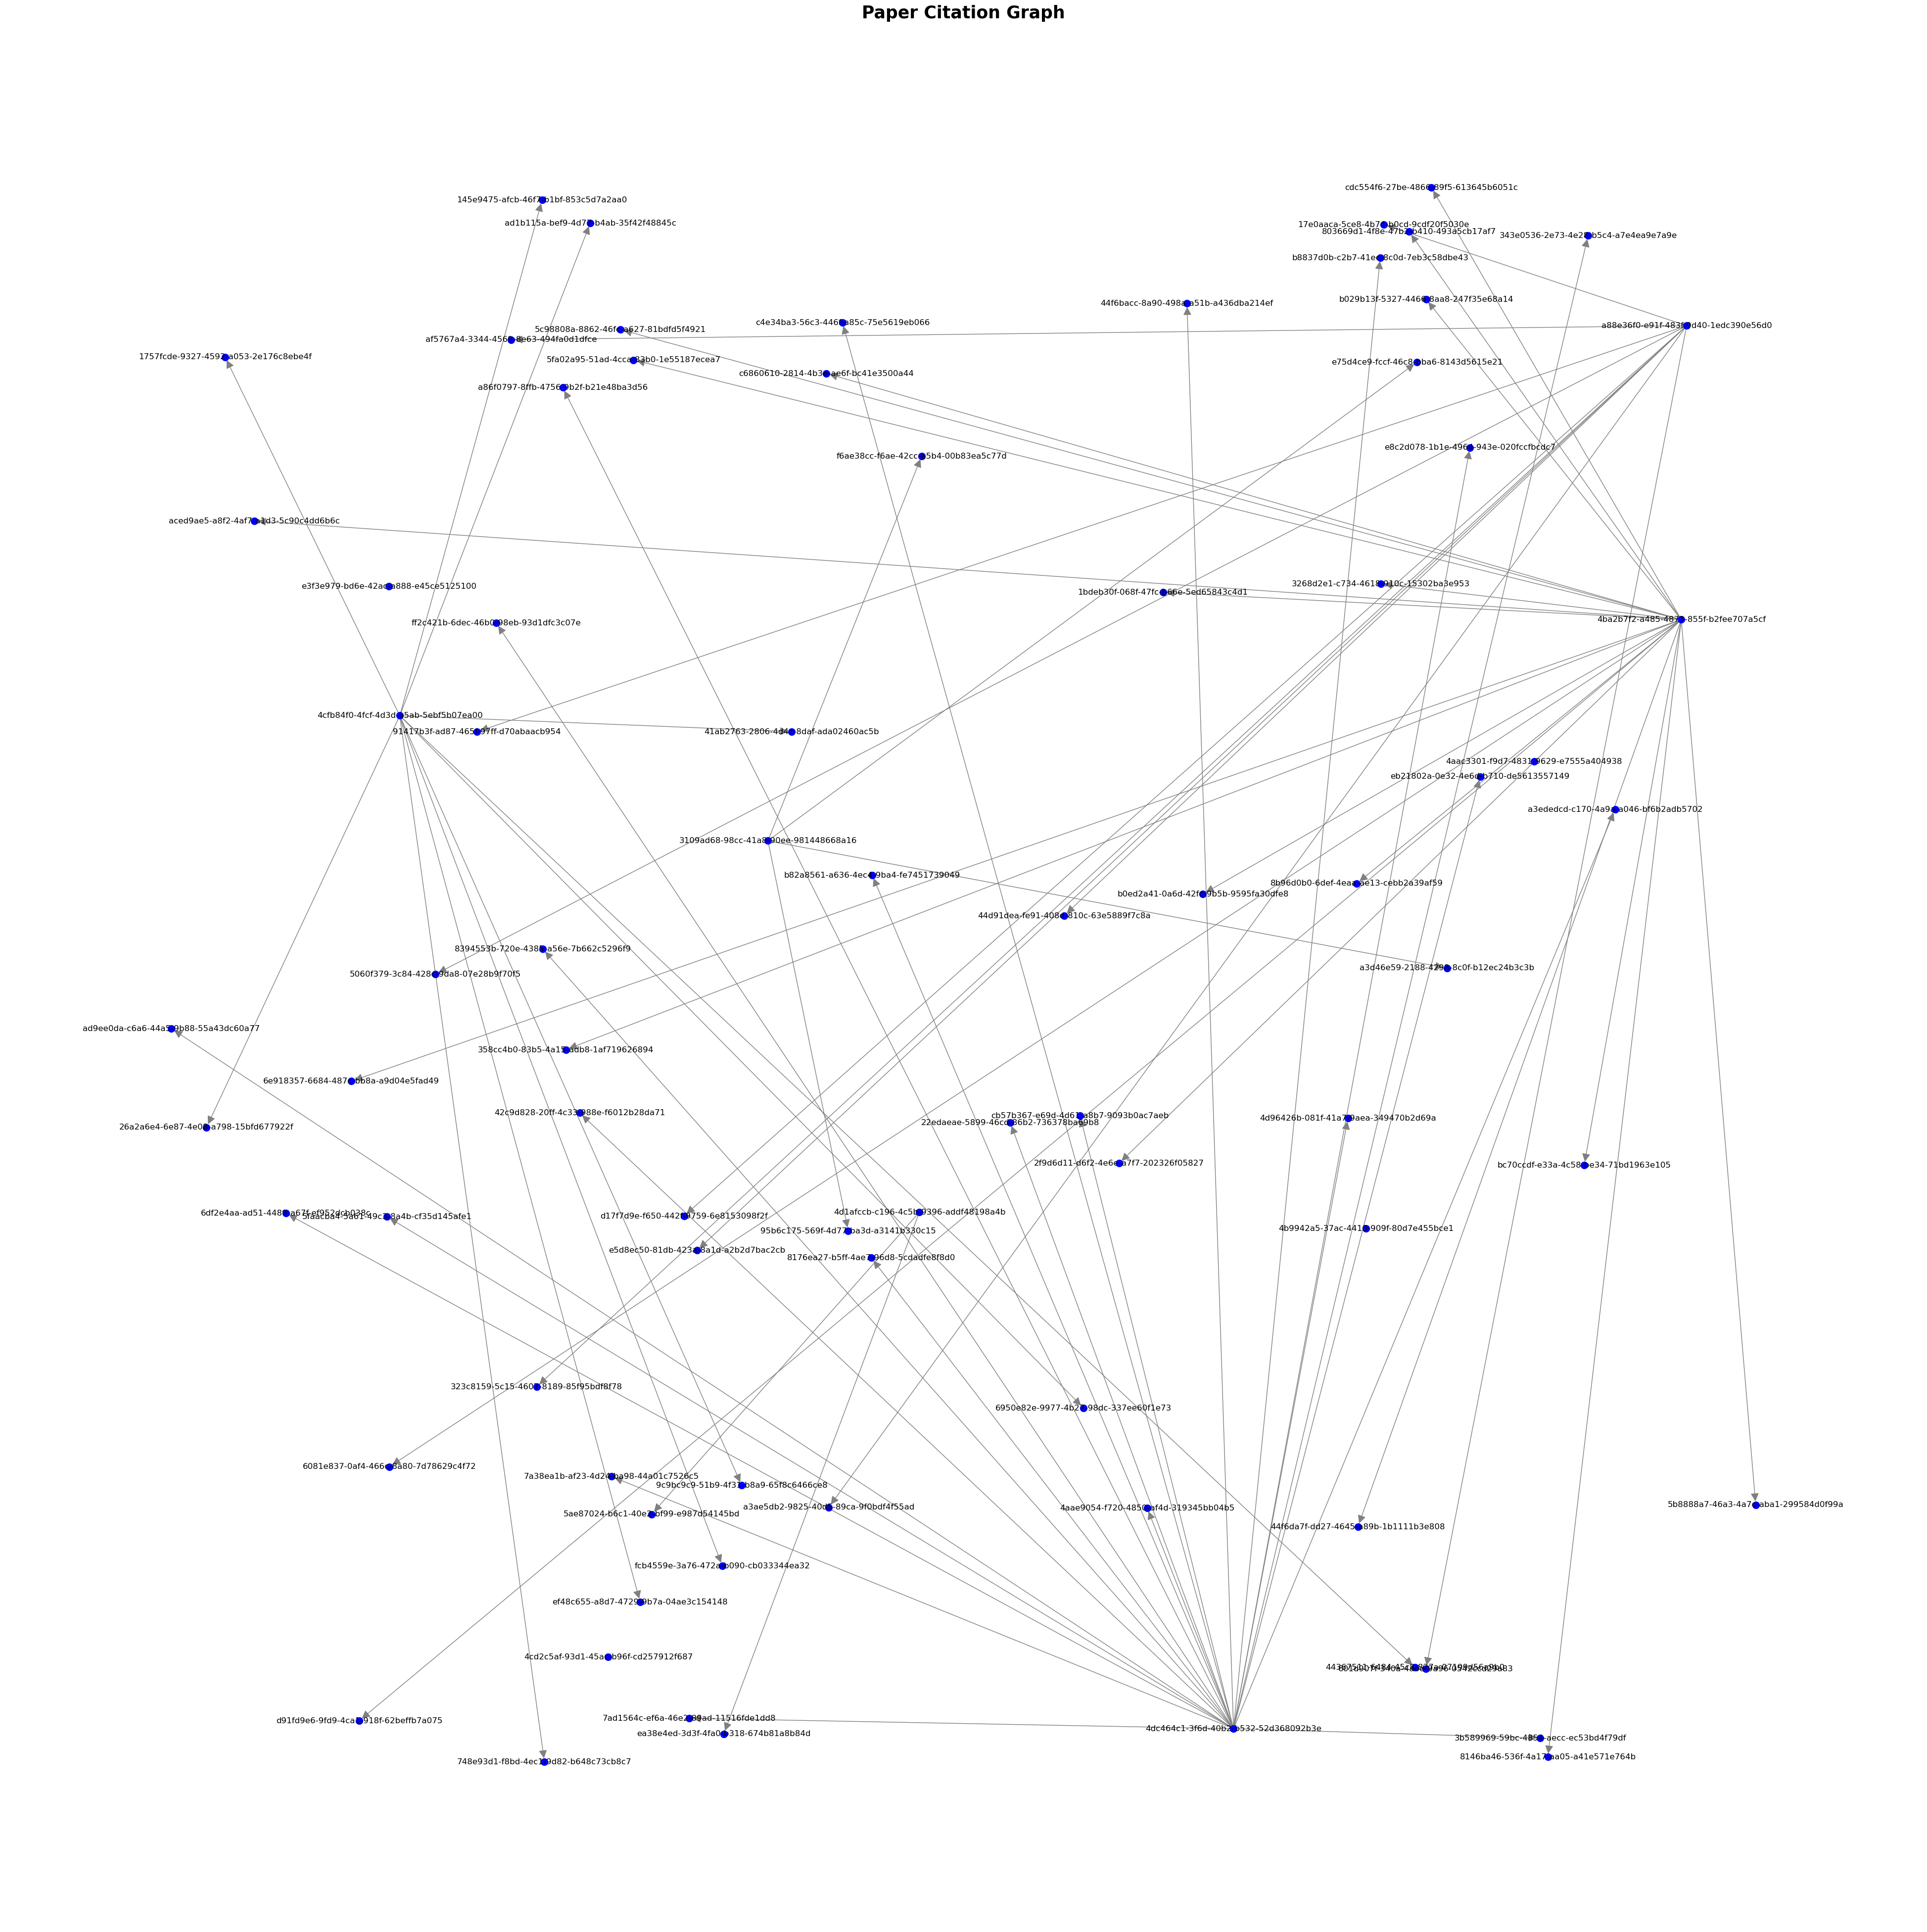

In [113]:
# dict with paper id as keys and references as values
citation_map = dblp_data.set_index('id')['references'].to_dict()
#directed graph
citation_graph = nx.DiGraph(citation_map)
# Graph for visual representation of our dict
fig = plt.figure(figsize=(50,50)) ;
plt.title('Paper Citation Graph', fontweight='bold', fontsize='25')
pos = nx.random_layout(citation_graph) # You can try circular_layout for better visualization
nx.draw(citation_graph, pos=pos, with_labels=True, node_size=100, 
        node_color='b', edge_color='gray', arrowsize=25)
		

## Author Conference Graph

In [114]:
# Explode the authors column to create one row per author
# The explode operation converts list elements into separate rows while preserving other column values
expanded_authors_df = dblp_data.explode('authors')
author_venue_map = {}
for i in expanded_authors_df["authors"].tolist():
  author_venue_map[i] = expanded_authors_df[expanded_authors_df["authors"]==i]["venue"].tolist()
# Filter out authors with empty venue values
# This removes entries where venue information is missing or blank
filtered_venue_map = {}
for key, values in author_venue_map.items():
  if values != ['']:
    filtered_venue_map[key] = values
filtered_venue_map
# Create a network graph representation of author-venue relationships
# NetworkX interprets dictionary values as edge connections
conference_graph = nx.Graph(filtered_venue_map)


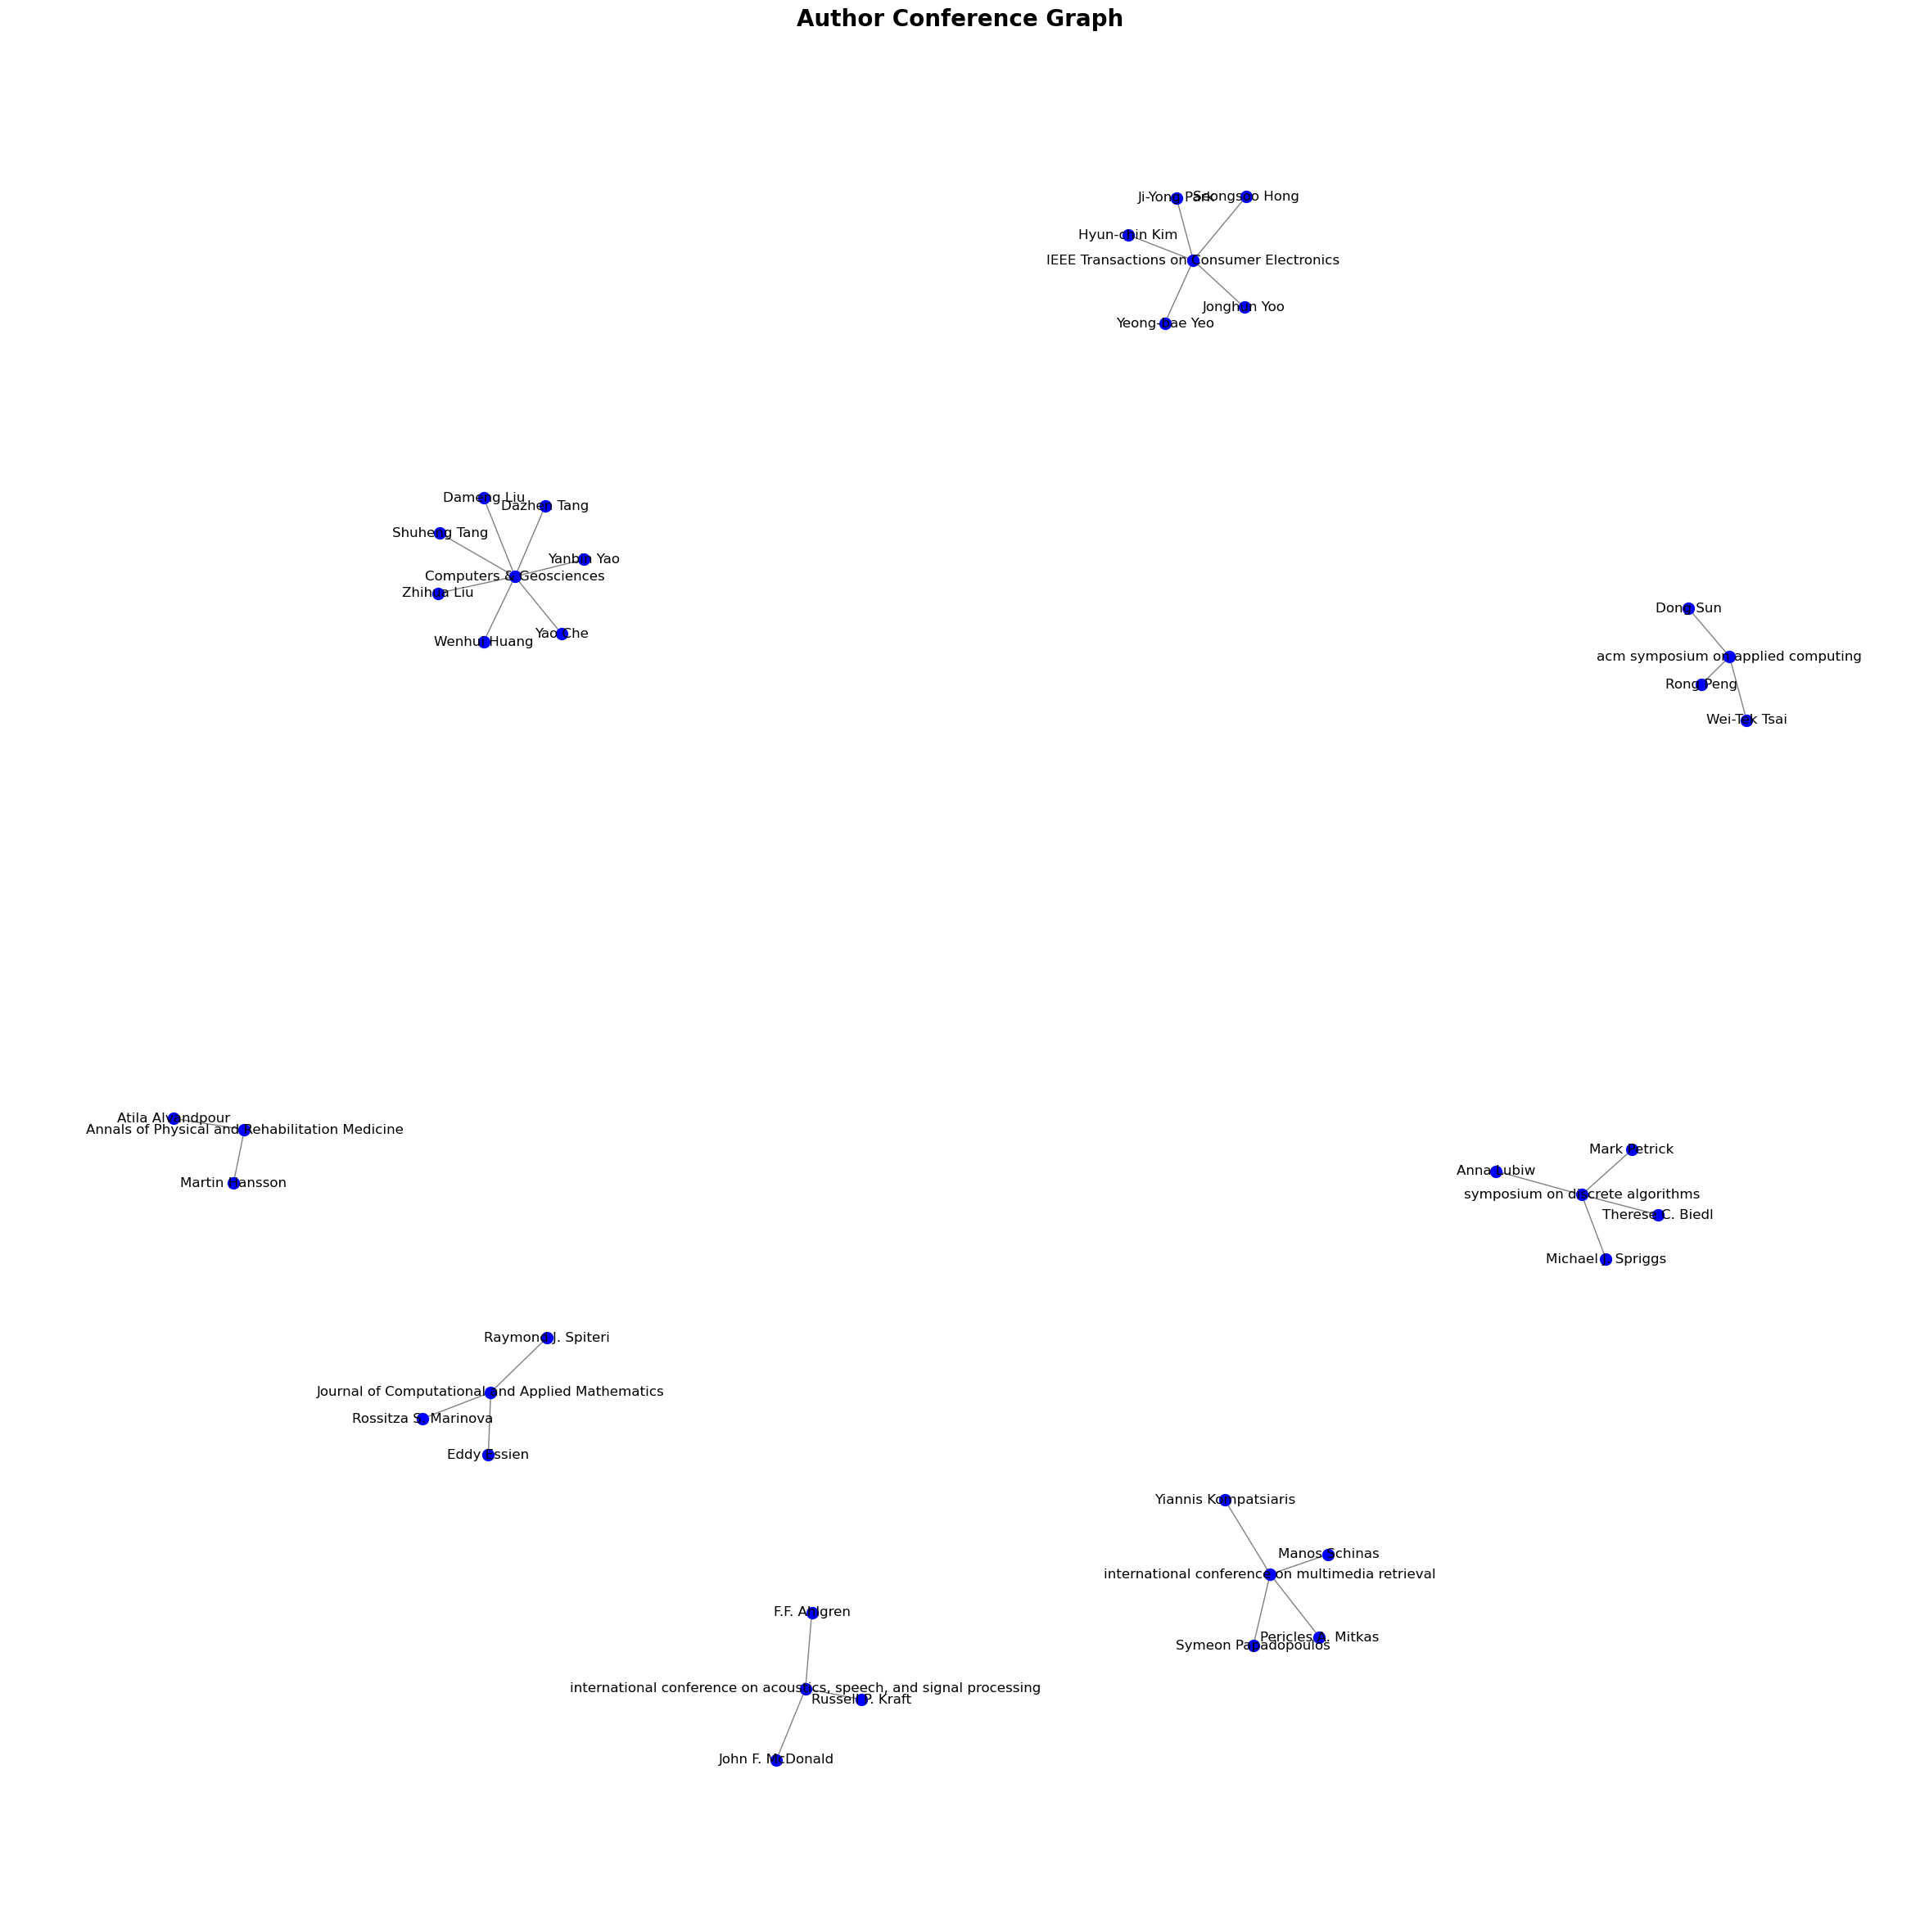

In [115]:
# Visualize the author-venue network
# Spring layout positions nodes based on simulated forces to minimize edge crossings
fig = plt.figure(figsize=(30,30)) ;
plt.title('Author Conference Graph', fontweight='bold', fontsize='20')
pos = nx.spring_layout(conference_graph)
nx.draw(conference_graph, pos=pos, with_labels=True, node_size=100, 
        node_color='b', edge_color='grey', arrowsize=25)

## Analysis 1

In [116]:
# Graph characterstics for Sample Known-Authors Graph
# Network Analysis of Known Authors Graph
# Calculating key graph metrics and clique characteristics
from networkx.algorithms.bipartite.basic import degrees
from statistics import mean 
import statistics

node_count = coauthor_graph.number_of_nodes()
edge_count = coauthor_graph.number_of_edges()
graph_density = nx.density(coauthor_graph)
component_count = nx.number_connected_components(coauthor_graph)
degree = coauthor_graph.degree()
print ("number of nodes:", node_count)
print ("number of edges:", edge_count)
print ("graph_density:", graph_density)
print ("number of components:", component_count)
# Degree analysis
min_degree = min(degree, key=lambda x:x[1])
print ("minimum degree:", min_degree)

max_degree = max(degree, key=lambda x:x[1])
print ("maximum degree", max_degree)
# Calculate average degree and standard deviation
result = list(map(list, zip(*degree)))
names, degre = result
degre = list(degre)
average_degree = mean(degre)
print ("average degree:", average_degree)

stdv = statistics.pstdev(degre)
print ("standard deviation degree:", stdv)

number of nodes: 36
number of edges: 57
graph_density: 0.09047619047619047
number of components: 10
minimum degree: ('Minglun Ren', 1)
maximum degree ('Yanbin Yao', 6)
average degree: 3.1666666666666665
standard deviation degree: 1.6244657241348273


In [117]:
# Clique analysis
clique_dict = nx.node_clique_number(coauthor_graph, nodes=None, cliques=None)
sorted_clique_dict = sorted(clique_dict.items(), key=lambda x:x[1])

# Function to find cliques of a specific size and track largest clique
greatest_clique = 0
input_clique = 0
def find_cliques_size_k(graph, k):
  count = 0
  global input_clique 
  global greatest_clique
  input_clique = k
  for clique in nx.find_cliques(graph):
    if len(clique) == k:
      count += 1
    elif len(clique) > k: 
      if len(clique) > greatest_clique:
        greatest_clique = len(clique)
  print ("There are", count, "cliques of size", k, "in this graph")

# Search for cliques of size 5
find_cliques_size_k(coauthor_graph, 5)


if greatest_clique > input_clique:
  print ("\033[1;31mThere are cliques in this graph larger than", input_clique)
  print ("The maximum clique size is:", greatest_clique,)
else:
  print ("\033[1;32m", input_clique, "is the maximum clique in this graph", )

sorted_clique_dict

# Authors who belong to cliques of size 7
known_authors = [item for item in sorted_clique_dict if item[1] == 7]
known_authors

There are 1 cliques of size 5 in this graph
There are cliques in this graph larger than 5
The maximum clique size is: 7


[('Dazhen Tang', 7),
 ('Shuheng Tang', 7),
 ('Zhihua Liu', 7),
 ('Wenhui Huang', 7),
 ('Dameng Liu', 7),
 ('Yao Che', 7),
 ('Yanbin Yao', 7)]

In [118]:
# Network Analysis of Citation Graph
# Calculating key graph metrics and degree statistics
node_count = citation_graph.number_of_nodes()
edge_count = citation_graph.number_of_edges()
graph_density = nx.density(citation_graph)
degree = citation_graph.degree()
min_degree = min(degree, key=lambda x:x[1])
max_degree = max(degree, key=lambda x:x[1])

result = list(map(list, zip(*degree)))
names, degre = result
degre = list(degre)
average_degree = mean(degre)

stdv = statistics.pstdev(degre)

print ("number of nodes:", node_count)
print ("number of edges:", edge_count)
print ("graph_density:", graph_density)
print ("minimum degree:", min_degree)
print ("maximum degree", max_degree)
print ("average degree:", average_degree)
print ("standard deviation degree:", stdv)

number of nodes: 80
number of edges: 70
graph_density: 0.011075949367088608
minimum degree: ('4aac3301-f9d7-4831-9629-e7555a404938', 0)
maximum degree ('4dc464c1-3f6d-40b2-b532-52d368092b3e', 23)
average degree: 1.75
standard deviation degree: 3.526683994916471


In [119]:
# Network Analysis of Author-Venue Graph
# Calculating graph metrics and degree distribution statistics

node_count = conference_graph.number_of_nodes()
edge_count = conference_graph.number_of_edges()
graph_density = nx.density(conference_graph)
component_count = nx.number_connected_components(conference_graph)
degree = conference_graph.degree()
print ("number of nodes:", node_count)
print ("number of edges:", edge_count)
print ("graph_density:", graph_density)
print ("number of components:", component_count)

min_degree = min(degree, key=lambda x:x[1])
print ("minimum degree:", min_degree)

max_degree = max(degree, key=lambda x:x[1])
print ("maximum degree", max_degree)

result = list(map(list, zip(*degree)))
names, degre = result
degre = list(degre)
average_degree = mean(degre)
print ("average degree:", average_degree)

stdv = statistics.pstdev(degre)
print ("standard deviation degree:", stdv)


number of nodes: 39
number of edges: 31
graph_density: 0.04183535762483131
number of components: 8
minimum degree: ('Rossitza S. Marinova', 1)
maximum degree ('Computers & Geosciences', 7)
average degree: 1.5897435897435896
standard deviation degree: 1.3343191621802757


## Analysis 2

In [120]:

paper_list = list(dblp_dataset["authors"])

author_collab_map = {}
for authors in paper_list:
    for author in authors:
        if author not in author_collab_map:
            author_collab_map[author] = set()
        author_collab_map[author].update(authors)

for author in author_collab_map:
    author_collab_map[author].discard(author)

full_coauthor_graph = nx.Graph()
for author, coauthors in author_collab_map.items():
    for coauthor in coauthors:
        full_coauthor_graph.add_edge(author, coauthor)

full_coauthor_graph.remove_edges_from(nx.selfloop_edges(full_coauthor_graph))

num_cliques = sum(1 for _ in nx.find_cliques(full_coauthor_graph))
print("Total number of cliques:", num_cliques)

clique_dict = nx.node_clique_number(full_coauthor_graph)
print("Largest clique size for each author (dict):", dict(list(clique_dict.items())[:100]))


Total number of cliques: 27478
Largest clique size for each author (dict): {'Punam Bedi': 4, 'Ravish Sharma': 3, 'Aakanksha': 3, 'Ruchika Garg': 4, 'Vinita Jindal': 4, 'Heena Dhankani': 4, 'Hema Banati': 4, 'Anjali Thukral': 4, 'Savita M. Datta': 4, 'Masaru Noda': 4, 'Kazuhiro Takeda': 4, 'Naoki Kimura': 4, 'Takashi Hamaguchi': 4, 'Alejandro Ortiz': 7, 'Kevin Valenzuela': 7, 'Ian Donovan': 7, 'Kazunori Okada': 7, 'Xiaorong Zhang': 7, 'Hao Jiang': 9, 'Sergey Dusheyko': 7, 'Sadia Riaz': 4, 'Dayang Rohaya Awang Rambli': 4, 'Arif Mushtaq': 4, 'Rohani Salleh': 4, 'Marc Gesnik': 8, 'Mickael Tanter': 8, 'Thomas Deffieux': 8, 'Serge Picaud': 8, 'Kevin Blaize': 8, 'José-Alain Sahel': 8, 'Mathias Fink': 8, 'Jean-Luc Gennisson': 8, 'Stefano Vissicchio': 3, 'Giuseppe Di Battista': 3, 'Luca Cittadini': 3, 'Bin Liang': 2, 'Lihong Zheng': 2, 'N. Rosenberg': 3, 'Dan A. Simovici': 3, 'Szymon Jaroszewicz': 3, 'Andriyan Bayu Suksmono': 2, 'Akira Hirose': 2, 'Jiri Novotny': 2, 'Pavel Piskač': 2, 'Hong-Gi 

In [121]:
# Visualizing the Co-authorship Network
# Creating a large-scale visualization of author collaboration patterns
'''
fig = plt.figure(figsize=(70,70)) ;
plt.title('Known Authors Graph', fontweight='bold', fontsize='20')
pos = nx.random_layout(full_coauthor_graph)
nx.draw(full_coauthor_graph, pos=pos, with_labels=True, node_size=100, 
        node_color='b', edge_color='grey', arrowsize=25)

'''

"\nfig = plt.figure(figsize=(70,70)) ;\nplt.title('Known Authors Graph', fontweight='bold', fontsize='20')\npos = nx.random_layout(full_coauthor_graph)\nnx.draw(full_coauthor_graph, pos=pos, with_labels=True, node_size=100, \n        node_color='b', edge_color='grey', arrowsize=25)\n\n"

In [122]:
sorted_clique_dict = sorted(clique_dict.items(), key=lambda x:x[1])
greatest_clique = 0
input_clique = 0
def find_cliques_size_k(graph, k):
  count = 0
  global input_clique 
  global greatest_clique
  input_clique = k
  for clique in nx.find_cliques(graph):
    if len(clique) == k:
      count += 1
    elif len(clique) > k: 
      if len(clique) > greatest_clique:
        greatest_clique = len(clique)
  print ("There are", count, "cliques of size", k, "in this graph")

find_cliques_size_k(full_coauthor_graph, 5)


if greatest_clique > input_clique:
  print ("\033[1;31mThere are cliques in this graph larger than", input_clique)
  print ("The larger clique size is:", greatest_clique,)
else:
  print ("\033[1;32m", input_clique, "is the larger clique in this graph", )

There are 2615 cliques of size 5 in this graph
There are cliques in this graph larger than 5
The larger clique size is: 31


In [123]:
sorted_clique_dict
known_authors = [item for item in sorted_clique_dict if item[1] == 31]
known_authors


[('Andrew M. McIntosh', 31),
 ('Joanna M. Wardlaw', 31),
 ('Hao Chen', 31),
 ('Nicholas G. Martin', 31),
 ('L. Elliot Hong', 31),
 ('Charles P. Peterson', 31),
 ('Hilleke E. Hulshoff Pol', 31),
 ('John M. Starr', 31),
 ('Peter Kochunov', 31),
 ('Ravi Duggirala', 31),
 ('Katie L. McMahon', 31),
 ('Laura Almasy', 31),
 ('Bennett A. Landman', 31),
 ('Joanne E. Curran', 31),
 ('Arthur W. Toga', 31),
 ('Sarah E. Medland', 31),
 ('Rene L. Olvera', 31),
 ('David C. Glahn', 31),
 ('Paul M. Thompson', 31),
 ('Braxton D. Mitchell', 31),
 ('Emma Sprooten', 31),
 ('Jessika E. Sussmann', 31),
 ('Peter T. Fox', 31),
 ('Rachel M. Brouwer', 31),
 ('Ian J. Deary', 31),
 ('Neda Jahanshad', 31),
 ('Thomas E. Nichols', 31),
 ('Mark E. Bastin', 31),
 ('René C.W. Mandl', 31),
 ('Margaret J. Wright', 31),
 ('Greig I. de Zubicaray', 31),
 ('John Blangero', 31),
 ('M. Saletta', 31),
 ('T. Bel', 31),
 ('Bram van Ginneken', 31),
 ('Ernst Th. Scholten', 31),
 ('Cornelia Schaefer-Prokop', 31),
 ('Colin Jacobs', 31

## Analysis 3

In [124]:
# dict with paper id as keys and references as values
paper_citation_map = dblp_dataset.set_index('id')['references'].to_dict()
filtered_citation_map = {}
for key, values in paper_citation_map.items():
  if values != ['']:
    filtered_citation_map[key] = values
filtered_citation_map

paper_citation_graph = nx.DiGraph(filtered_citation_map)

In [125]:
dict(list(filtered_citation_map.items())[:10])

{'00127ee2-cb05-48ce-bc49-9de556b93346': ['51c7e02e-f5ed-431a-8cf5-f761f266d4be',
  '69b625b9-ebc5-4b60-b385-8a07945f5de9'],
 '001c58d3-26ad-46b3-ab3a-c1e557d16821': ['10482dd3-4642-4193-842f-85f3b70fcf65',
  '3133714c-f979-4d84-9224-97361cf053ab',
  '3a926fef-7422-4654-8776-8e31b45be563',
  '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec',
  '6f52f995-7c4c-4a92-83aa-d1c9fbd2465c',
  '8bd964d6-c45f-448c-9e65-efe5f98ca0a0',
  '8fa0a362-6522-48fc-bd5e-24de00ed6511',
  '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b',
  'b57cc9ef-64b6-479d-9918-5f283af3219d',
  'b678b546-e867-4a57-8963-c5545b04f32d',
  'e5c40bf5-7ee2-4cff-a75a-b708ab69997b',
  'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d',
  'fdd93623-31c8-487b-8554-d6c6b25af5f6'],
 '001c8744-73c4-4b04-9364-22d31a10dbf1': ['2d84c0f2-e656-4ce7-b018-90eda1c132fe',
  'a083a1b9-8dfb-45d6-99a9-fa30c4a6e9f5'],
 '00338203-9eb3-40c5-9f31-cbac73a519ec': ['8c78e4b0-632b-4293-b491-85b1976675e6',
  '9cdc54f0-f1a0-4422-ac16-d9164d9371ee'],
 '00701b05-684f-45f9-b281-425abfec482c

In [126]:
#visual representation of our dict
'''
fig = plt.figure(figsize=(50,50)) ;
plt.title('Paper Citation Graph', fontweight='bold', fontsize='20')
pos = nx.circular_layout(paper_citation_graph)
nx.draw(paper_citation_graph, pos=pos, with_labels=True, node_size=100, 
        node_color='b', edge_color='grey', arrowsize=25)
'''

"\nfig = plt.figure(figsize=(50,50)) ;\nplt.title('Paper Citation Graph', fontweight='bold', fontsize='20')\npos = nx.circular_layout(paper_citation_graph)\nnx.draw(paper_citation_graph, pos=pos, with_labels=True, node_size=100, \n        node_color='b', edge_color='grey', arrowsize=25)\n"

In [127]:
degree_dict = nx.in_degree_centrality(paper_citation_graph)
degree_dict

ten = Counter(degree_dict)
top_ten = ten.most_common(10)
for i in top_ten:
    print(i[0]," :",i[1]," ")

b944f77f-113b-4a02-ae5e-d4a124b8fd5b  : 0.0008206145393587796  
c1b6b493-01ef-420f-be44-7bacfe34e846  : 0.0006758002088837009  
6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3  : 0.0005968105740791125  
f6bd8b64-684d-429a-aab5-8ff3a2c23cd6  : 0.0005353741914533214  
dd83785a-dd19-41e3-9b25-ebabbd48d336  : 0.00041688973924643884  
50dd56db-151d-4d62-8576-65f0ef6f381b  : 0.00039494817402294205  
9d912297-e52f-4ab6-add4-633e0f263933  : 0.0003686182957547459  
8026f56a-a93e-4933-8ead-c9aa9e3f0498  : 0.00036422998271004657  
7f1214b2-e070-4ff2-a5d3-647e7c16c2d7  : 0.0003554533566206479  
65d5ccdc-7022-45b0-adf9-0385273b1283  : 0.0003554533566206479  


## Analysis 0

In [128]:
# Network Analysis for Known-Authors Graph

node_count = full_coauthor_graph.number_of_nodes()
edge_count = full_coauthor_graph.number_of_edges()
graph_density = nx.density(full_coauthor_graph)
component_count = nx.number_connected_components(full_coauthor_graph)
degree = full_coauthor_graph.degree()
print ("number of nodes:", node_count)
print ("number of edges:", edge_count)
print ("graph_density:", graph_density)
print ("number of components:", component_count)

min_degree = min(degree, key=lambda x:x[1])
print ("minimum degree:", min_degree)

max_degree = max(degree, key=lambda x:x[1])
print ("maximum degree", max_degree)

result = list(map(list, zip(*degree)))
names, degre = result
degre = list(degre)
average_degree = mean(degre)
print ("average degree:", average_degree)

stdv = statistics.pstdev(degre)
print ("standard deviation degree:", stdv)

number of nodes: 77723
number of edges: 147612
graph_density: 4.887177775127137e-05
number of components: 14154
minimum degree: ('Gareth Beale', 1)
maximum degree ('Wei Wang', 105)
average degree: 3.7984123103843137
standard deviation degree: 3.4012365278363164


In [129]:

#Network Analysis Paper-Citation Graph

node_count = paper_citation_graph.number_of_nodes()
edge_count = paper_citation_graph.number_of_edges()
graph_density = nx.density(paper_citation_graph)
degree = paper_citation_graph.degree()
min_degree = min(degree, key=lambda x:x[1])
max_degree = max(degree, key=lambda x:x[1])

result = list(map(list, zip(*degree)))
names, degre = result
degre = list(degre)
average_degree = mean(degre)

stdv = statistics.pstdev(degre)

print ("number of nodes:", node_count)
print ("number of edges:", edge_count)
print ("graph_density:", graph_density)
print ("minimum degree:", min_degree)
print ("maximum degree", max_degree)
print ("average degree:", average_degree)
print ("standard deviation degree:", stdv)

number of nodes: 227879
number of edges: 291639
graph_density: 5.616152554834257e-06
minimum degree: ('00bcf2d5-1592-46b0-81fd-933f90b5ecca', 0)
maximum degree ('ac20391b-bbff-4926-9c74-08dd0fdac740', 219)
average degree: 2.5595952237810415
standard deviation degree: 4.839473246727975


In [130]:

expanded_authors_full_df = dblp_dataset.explode('authors')

full_venue_map = {}
for i in expanded_authors_full_df["authors"].tolist():
  full_venue_map[i] = expanded_authors_full_df[expanded_authors_full_df["authors"]==i]["venue"].tolist()

In [131]:
for keys, values in full_venue_map.items():
  if '' in values:
   values.remove('')

filtered_venue_dict = filtered_venue_dict = {k:v for k,v in full_venue_map.items() if v}
# Passing the dict into nx.Graph to return a Graph
conference_graph = nx.Graph(filtered_venue_dict)

In [132]:
# Network Analysis for Author-Venue/Conference Graph

node_count = conference_graph.number_of_nodes()
edge_count = conference_graph.number_of_edges()
graph_density = nx.density(conference_graph)
component_count = nx.number_connected_components(conference_graph)
degree = conference_graph.degree()
print ("number of nodes:", node_count)
print ("number of edges:", edge_count)
print ("graph_density:", graph_density)
print ("number of components:", component_count)

min_degree = min(degree, key=lambda x:x[1])
print ("minimum degree:", min_degree)

max_degree = max(degree, key=lambda x:x[1])
print ("maximum degree", max_degree)

result = list(map(list, zip(*degree)))
names, degre = result
degre = list(degre)
average_degree = mean(degre)
print ("average degree:", average_degree)

stdv = statistics.pstdev(degre)
print ("standard deviation degree:", stdv)

number of nodes: 70305
number of edges: 80199
graph_density: 3.24513449542644e-05
number of components: 455
minimum degree: ('Makoto Satoh', 1)
maximum degree ('global communications conference', 2574)
average degree: 2.2814593556646043
standard deviation degree: 16.75011715215482
